In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import data
data = pd.read_csv("data.csv")
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0


In [3]:
print (data.shape)

(48842, 15)


In [4]:
data.describe()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,3.870439,1.896641e+05,10.288420,10.078089,2.618750,6.577700,1.443287,3.668052,0.668482,1079.067626,87.502314,40.422382,36.749355,0.239282
std,13.710510,1.464234,1.056040e+05,3.874492,2.570973,1.507703,4.230509,1.602151,0.845986,0.470764,7452.019058,403.004552,12.391444,7.775343,0.426649
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.175505e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.781445e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.376420e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.490400e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [5]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Fortunately there's no any missing value

In [6]:
data.dtypes

age                int64
workclass          int64
fnlwgt             int64
education          int64
educational-num    int64
marital-status     int64
occupation         int64
relationship       int64
race               int64
gender             int64
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country     int64
income             int64
dtype: object

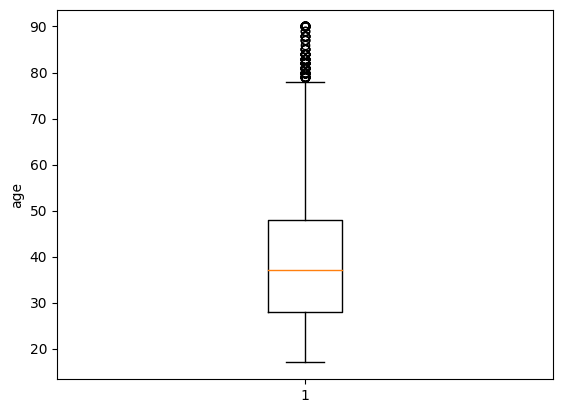

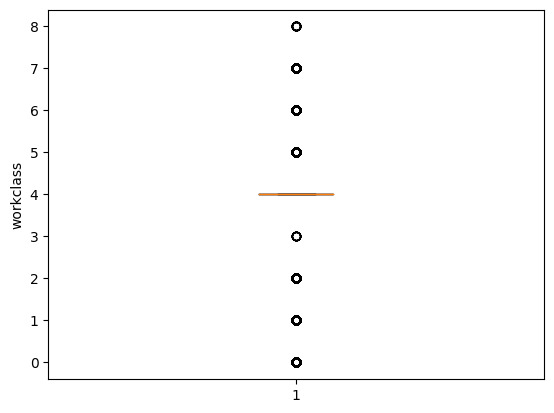

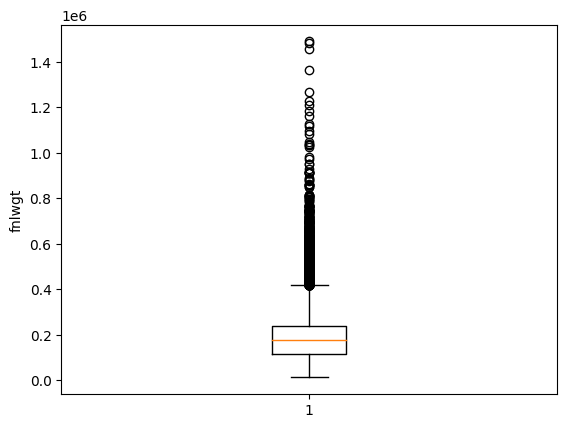

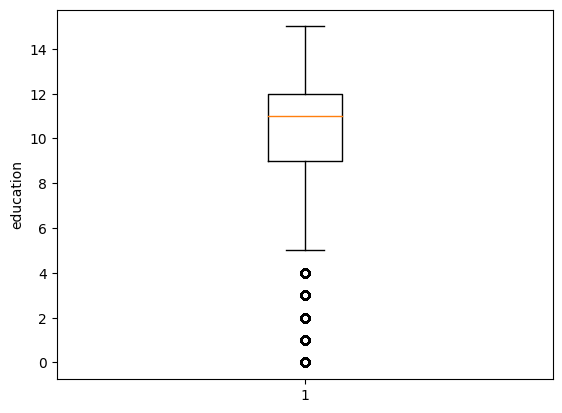

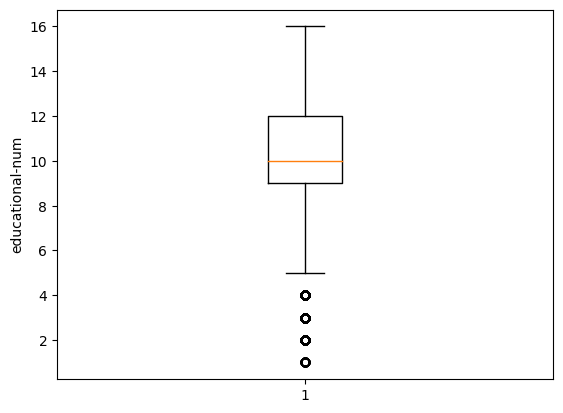

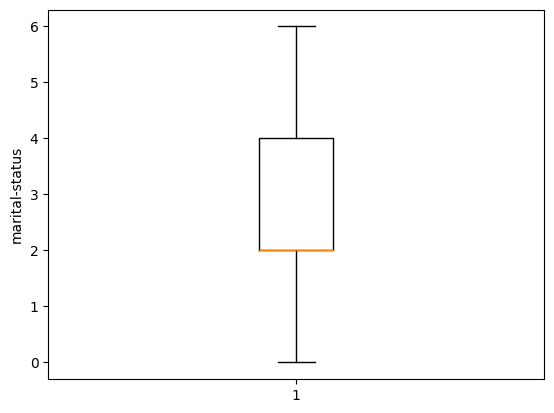

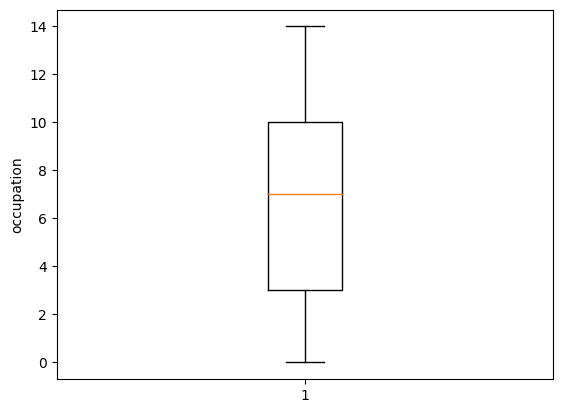

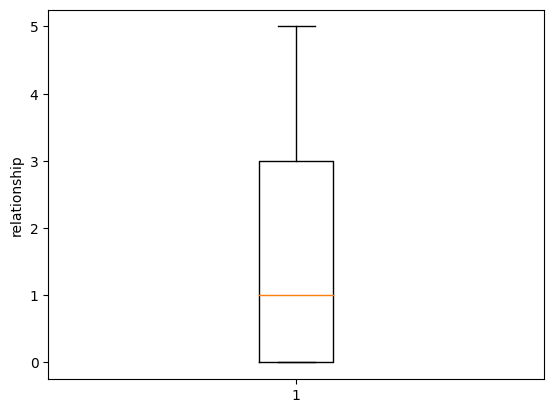

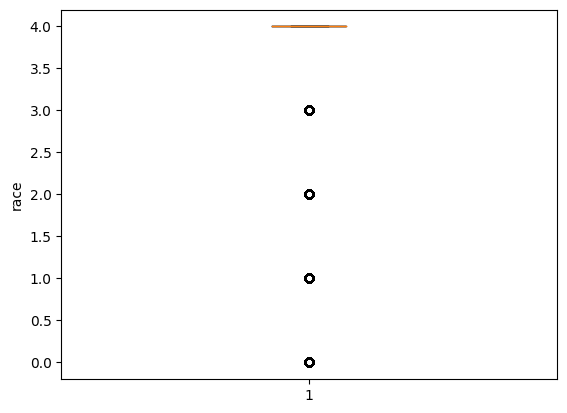

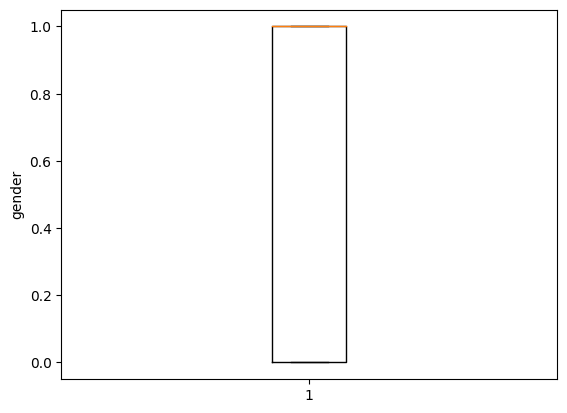

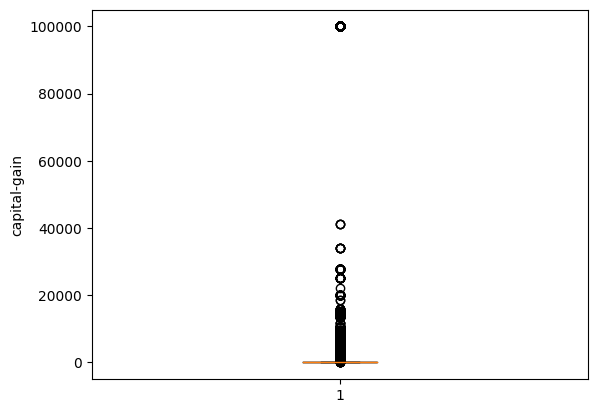

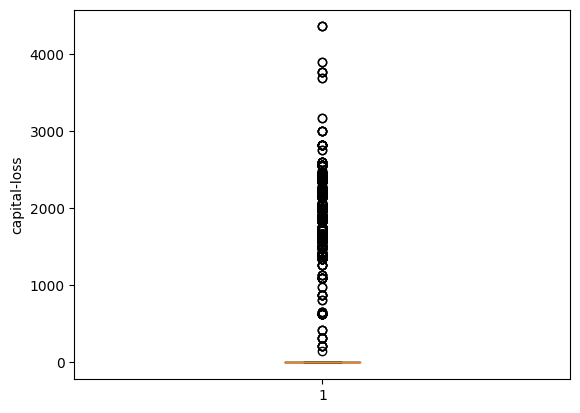

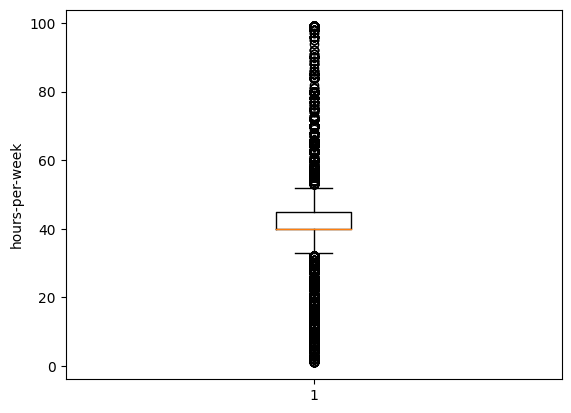

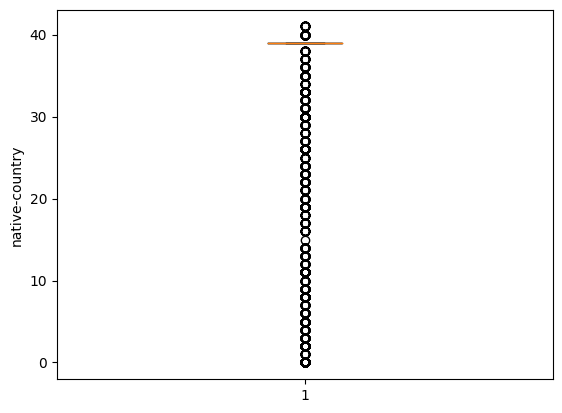

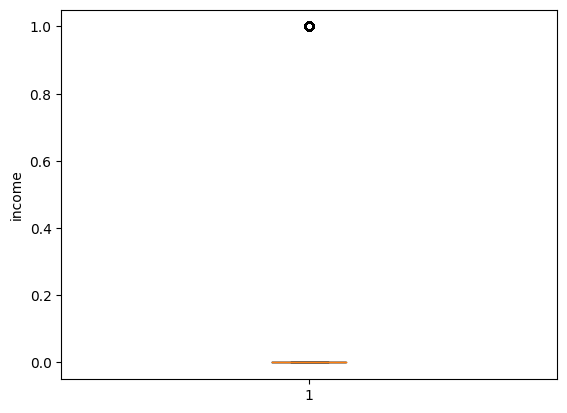

In [7]:
for col in data.columns:
    plt.boxplot(data[col].values)
    plt.ylabel(col)
    plt.show()

There are a lot of outliers and we should remove them from dataset

In [8]:
# Normalize
scaler = StandardScaler()

In [9]:
for col in data.columns:
    if data[col].std() >= 10:
        data[col] = scaler.fit_transform(data[col].values.reshape(-1, 1))

In [10]:
data.describe()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,4.884200e+04,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,4.884200e+04,4.884200e+04,4.884200e+04,48842.000000,48842.000000
mean,2.281092e-16,3.870439,-5.848208e-17,10.288420,10.078089,2.618750,6.577700,1.443287,3.668052,0.668482,1.047440e-17,-1.018345e-17,4.466169e-17,36.749355,0.239282
std,1.000010e+00,1.464234,1.000010e+00,3.874492,2.570973,1.507703,4.230509,1.602151,0.845986,0.470764,1.000010e+00,1.000010e+00,1.000010e+00,7.775343,0.426649
min,-1.578629e+00,0.000000,-1.679680e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.448035e-01,-2.171271e-01,-3.181452e+00,0.000000,0.000000
25%,-7.763164e-01,4.000000,-6.828752e-01,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,-1.448035e-01,-2.171271e-01,-3.408696e-02,39.000000,0.000000
50%,-1.198790e-01,4.000000,-1.090844e-01,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,-1.448035e-01,-2.171271e-01,-3.408696e-02,39.000000,0.000000
75%,6.824334e-01,4.000000,4.543232e-01,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,-1.448035e-01,-2.171271e-01,3.694214e-01,39.000000,0.000000
max,3.745808e+00,8.000000,1.231723e+01,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,1.327438e+01,1.059179e+01,4.727312e+00,41.000000,1.000000


In [11]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,-0.995129,4,0.351675,1,7,4,7,3,2,1,-0.144804,-0.217127,-0.034087,39,0
1,-0.046942,4,-0.945524,11,9,2,5,0,4,1,-0.144804,-0.217127,0.772930,39,0
2,-0.776316,2,1.394723,7,12,2,11,0,4,1,-0.144804,-0.217127,-0.034087,39,1
3,0.390683,4,-0.277844,15,10,2,7,0,2,1,0.886874,-0.217127,-0.034087,39,1
4,-1.505691,0,-0.815954,15,10,4,0,3,4,0,-0.144804,-0.217127,-0.841104,39,0


In [12]:
# Save changes
data.to_csv("data.csv", index=False)